# Image Processing With Machine Learning
Date: 13 December 2019
Course: Convolutional Neural Netwroks for Image Processing 


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <br> **مقدمه ای بر تصویر**
        <br> اول یه سری از تصویر صحبت می کنیم. که تصویر چیست. نگران نباش سعی می کنم خیلی کوتاه باشه.
    </font>
    </div>

# Importing the Image

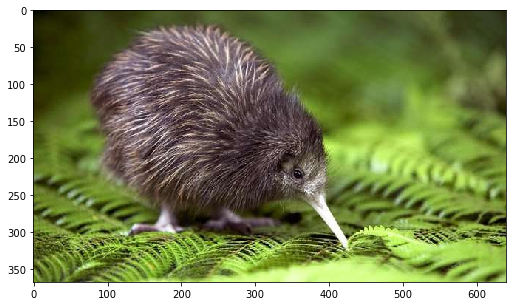

In [1]:
import matplotlib.pyplot as plt
kiwi = plt.imread('photos/kiwi.jpg')
cassowary = plt.imread('photos/cassowary.jpg')
angry_bird = plt.imread('photos/Northern-Cardinal.jpg')
plt.figure(figsize=(15,5))
plt.imshow(kiwi)
plt.show()

# Get a summary of the image

In [2]:
print('type of the image: ', type(kiwi))
print('Shape of the image: ', kiwi.shape)
print('Height of the image: {}'.format(kiwi.shape[0]))
print('Weight of the image: {}'.format(kiwi.shape[1]))
print('Dimension of the image: {}'.format(kiwi.ndim))

type of the image:  <class 'numpy.ndarray'>
Shape of the image:  (368, 640, 3)
Height of the image: 368
Weight of the image: 640
Dimension of the image: 3


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> در واقع یه تصویر رنگی، سه تا ماتریس روی سر هم هست که به هر کدوم میگیم یه چنل. 
        <br> چنل قرمز (0) ، چنل سبز (1) و چنل آبی (2) 
        <br>  می تونیم هر چنل رو جداگانه نگاه کنیم
        <br> یعنی هر پیکسل ترکیبی از سه تا عدده و هر عدد درک متغیر هشت بیتی ذخیره شده است یعنی 
        <br>  uint8
        <br>  و اگر حساب کنیم متوجه میشیم که هر پیکسل می تونه 16.8 میلیون (رنگ که نه) سایه ایجاد کنه
        <br> یه مثال در اینجا نشون داده شده است
        </b>
    </font>
</div>

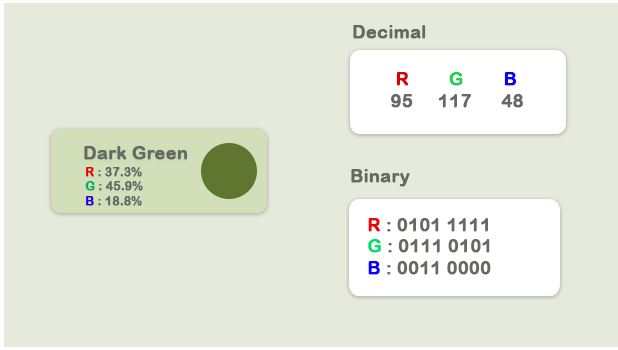

In [7]:
from PIL import Image
import IPython as IP
rgbPix = 'Photos/RGB_Pixel.PNG'
IP.display.Image(rgbPix)

In [3]:
print('Image size: {}'.format(kiwi.size))
print('Maximum RGB value in this image: {}'.format(kiwi.max()))
print('Minimum RGB value in this image: {}'.format(kiwi.min()))
print('size of the image is: {} = {}*{}*{}'.format(kiwi.size,kiwi.shape[0],kiwi.shape[1],kiwi.shape[2]))

Image size: 706560
Maximum RGB value in this image: 255
Minimum RGB value in this image: 0
size of the image is: 706560 = 368*640*3


# let's have a look into one pixel

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> حالا بیا ببینیم داخل یه پیکسل چی میگذره؟
        </b>
    </font>
</div>

In [4]:
pixel = kiwi[100,100]
print('Pixel at the position of 100 * 100:')
print('The value for Red is: {}\nThe value for Green is: {}\nThe value for Blue is: {}'.format(pixel[0],pixel[1],pixel[2]))


Pixel at the position of 100 * 100:
The value for Red is: 107
The value for Green is: 88
The value for Blue is: 94


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> از این اعداد راحت میشه فهمید که این پیکسل قرمز هست. نه اینکه کاملا قرمز باشه بلکه چون وزن قرمز خیلی زیاده باید توی محدوده ی قرمز باشه
        </b>
    </font>
</div>

# let's have a look into separate channels

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> می تونیم به طور جداگانه کانال ها رو ببینیم 
        </b>
    </font>
</div>

Text(0.5, 1.0, 'Only Blue channel')

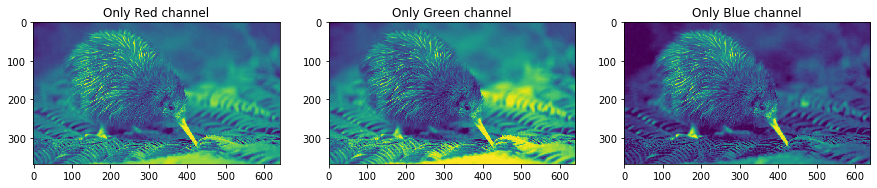

In [5]:
mainFrame, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax[0].imshow(kiwi[:,:,0])
ax[0].set_title('Only Red channel')
ax[1].imshow(kiwi[:,:,1])
ax[1].set_title('Only Green channel')
ax[2].imshow(kiwi[:,:,2])
ax[2].set_title('Only Blue channel')

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> اینجا من انتظار داشتم که کانال قرمز، قرمز باشه و کانال سبز، سبز باشه و کانال آبی، آبی. چرا اینطوری نشد؟ برای اینگه اینجا در تصویر شما علاوه بر کانال مثلا قرمز، در دو تا کانال دیگه هم اطلاعات داری. اگه دو تا کانال دیگه کاملا صفر بودند اونوقت حرف تو درست بود. حالا من یه کد میزنم که اونطوری بشه. 
        </b>
    </font>
</div>

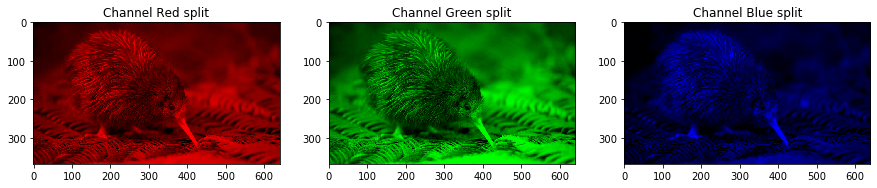

In [8]:
import numpy as np
kiwi_red = np.zeros(kiwi.shape, dtype='uint8')
kiwi_green = np.zeros(kiwi.shape, dtype='uint8')
kiwi_blue = np.zeros(kiwi.shape, dtype='uint8')
kiwi_red[:,:,0] = kiwi[:,:,0]
kiwi_green[:,:,1] = kiwi[:,:,1]
kiwi_blue[:,:,2] = kiwi[:,:,2]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].imshow(kiwi_red)
axes[0].set_title('Channel Red split')
axes[1].imshow(kiwi_green)
axes[1].set_title('Channel Green split')
axes[2].imshow(kiwi_blue)
axes[2].set_title('Channel Blue split')
plt.show()

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br>  الآن مثلا در تصویر اول دو تا کانال دیگه هیچ عددی ندارند و کاملا مقادیر صفر دارند. در این حالت کانال قرمز، قرمز است
        </b>
    </font>
</div>

In [9]:
kiwi.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

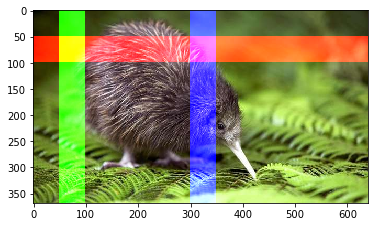

In [13]:
import numpy as np
kiwi4Manipulation = np.zeros(kiwi.shape,dtype='uint8')

kiwi4Manipulation[:,:,:] = kiwi[:,:,:]

kiwi4Manipulation[50:100,:,0] = 255
kiwi4Manipulation[:,50:100,1] = 255
kiwi4Manipulation[:,300:350,2] = 255
plt.imshow(kiwi4Manipulation)
plt.show()


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br>  بذار در مورد نوار قرمز حرف بزنیم. در اینجا من اومدم در اون پیکسل ها عدد مربوط به کانال قرمز رو ماکسیموم کردم. ولی اطلاعات مربوط به کانال سبز و آبی رو دست نزدم. بنابراین اطلاعات اونها هنوز هست به خاطر همینه که پشت اون نواز قرمز هنوز دارم اطلاعات تصویر رو میبینم. 
            <br> ولی خب مثلا اگه به اون مربع زرد نگاه کنی در اونجا من اطلاعات مربوط به دو تا کانال یعنی سبز و قرمز رو ماکسیموم کردم. بنابراین اطلاعات موجود در دوتا از سه کانال رو نابود کردم. بنابراین در اونحا دیگه من نمی تونم تشخیص بدم که تصویر چی بوده
        </b>
    </font>
</div>

# How to convert the image to GreyScale?
<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> اینکه ما تصاویر رو سیاه و سفید کنیم به این دلیل نیست که می خوایم با تصاویر پزشکی کار کنیم. حتی اونهایی ام که تصاویر رنگی کار میکنند اول سیاه و سفیدش می کنن و بعد که کاراشون رو برگردوندن برش می گردونن به رنگی. در واقع به خاطر سادگی این کار رو می کنند
            <br> تصویر رنگی هی تصویر سه بعدیه و تصویر گری اسکیل یه ماتریس دو بعدیه. پس قاعدتا برای تبدیل تصویر رنگی به سیاه و سفید باید یه جوری اون سه تا کانال رو با هم ترکیب کرد دیگه. فرمول تبدیل به صورت زیر است
        </b>
    </font>
</div>

                                            Y' = 0.299 R + 0.587 G + 0.114 B 

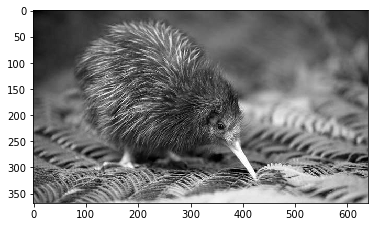

In [2]:
import numpy as np
import matplotlib.pyplot as plt
gray = lambda rgb: np.dot(rgb[:,:,:3], [0.299 , 0.587, 0.114])
kiwi_gs = gray(kiwi)
plt.imshow(kiwi_gs, cmap = plt.set_cmap('gray'))
plt.show()

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br>  که خوب من خودم با یه تابع اینکار رو کردم. اگه نخوای برای اینکار تابع از پیش نوشته شده هشت. الآن برای کاساواری اینکار رو می کنم
        </b>
    </font>
</div>

Text(0.5, 1.0, 'Cassowary (Greyscale)')

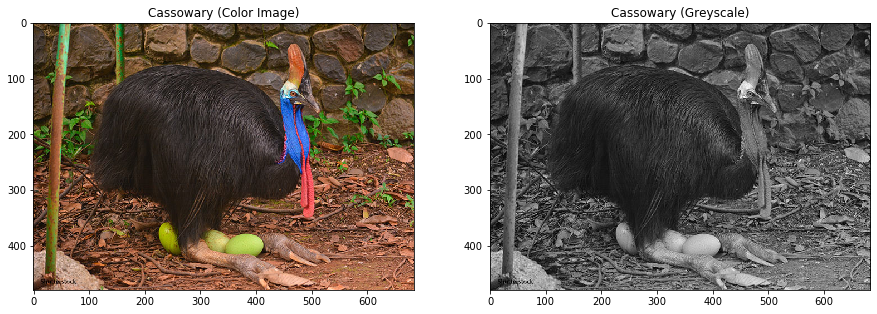

In [15]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axis[0].imshow(cassowary)
axis[0].set_title('Cassowary (Color Image)')
casso_cl = Image.open('photos/cassowary.jpg')
casso_gs = casso_cl.convert('L')
casso_gs.save('photos/cassowary_gs.jpg')
casso_gs1 = plt.imread('photos/cassowary_gs.jpg')
axis[1].imshow(casso_gs1)
axis[1].set_title('Cassowary (Greyscale)')

# Image Classifier: One-Hot Encoding
<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br>در مسائل کلاسیفیکیشن ما باید داده ها رو یه جوری که برای شبکه قابل فهم باشه ارائه بدیم و اون مدل اسمش هست وان هات اینکدینگ 
        <br> در زیر یه مثال ازش آوردم
        </b>

In [10]:
labels = ['shoe','t-shirt','dress','dress','dress','shoe','t-shirt','t-shirt','shoe','dress']
labels

['shoe',
 't-shirt',
 'dress',
 'dress',
 'dress',
 'shoe',
 't-shirt',
 't-shirt',
 'shoe',
 'dress']

In [11]:
import numpy as np
categories = np.array(['shoe','t-shirt','dress'])
n_categ = 3
onhe_labels = np.zeros(shape=(len(labels), n_categ))

for i in range(len(labels)):
               j = np.where(categories == labels[i])
               onhe_labels[i,j] = 1
    

In [12]:
onhe_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

# Cross-Validation

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br>  تو همیشه وقتی یه مدلی رو میسازی و اون رو ترین میکنی باید اون رو ولیدیت کنی و این کار رو با داده هایی که شبکه یا مدلت تاحالا ندیده اند انجام میدی. یعنی یه سری از داده ها رو قبل از ترین میذاری کنار به عنوان داده ی تست. بعد وقتی که مدل رو ترین کردی، داده های تیست رو بهش میدی. این کار رو می گن
         <br> Cross-Validation
        </b>
    </font>
    </div>


# Example 01:  Image Classification
The CIFAR-10 dataset
<br>
Source: http://www.cs.utoronto.ca/~kriz/cifar.html

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> این یه دیتاست خیلی باحاله که شامل 6000 تا تصویر رنگی لیبل خورده هست.دیتاست در قالب 6 تا بچ ذخیره شده که پنج تاش رو برای ترین گذاشته و یکی رو برای تست. هر بچ 1000 تا تصویر هست. 
            <br>
            <br> هر بچ در قالب یک دیکشنری هست که چهار تا المان داره. منظور از المان، زوج مرتب کی-ولیو هست 
            <br>
            <br> المان اول هیچی نیست. شماره ی بچ هست. که خیلی به درد نمی خوره
            <br>
            <br> المان دوم لیبل عکس ها هست. که عکس ها در ده تا کلاس هستند و این کلاس ها در ادامه توضیح داده شده است. از 0 تا 9 لیبل خورده اند
            <br>
            <br> المان سوم خود داده هست که در قالب یک آرایه ی نامپای با اندازه ی 10000 در 3072 هست. 10 هزارتا ردیف داره که خوب هر ردیف یه تصویر هست. در هر ردیف 3017 تا عدد داره که 1024 عدد اول مربوط به کانال قرمز، 1024 تای دوم مربوط به کانال سبز و 1024 تا آخر هم مربوط به کانال آبی می باشد
            <br>چرا 1024؟ چون تصاویر 32 در 32 هستند 
            <br>
            <br>
            <br>  در زیر همه ی کلاس ها رو آوردیم. 
        </b>
    </font>
    </div>

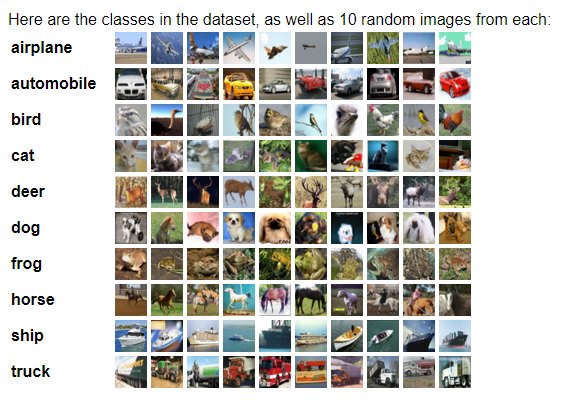

In [85]:
from PIL import Image
import IPython as IP
lanelsPgoto = 'Photos/labels4CIFR.PNG'
IP.display.Image(lanelsPgoto)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> داده ها رو من ددنلود کرده ام. ولی خب الآن باید اون رو لود کنم توی نوت بوک و آماده کنم
        </b>
    </font>
    </div>

In [3]:
# A function offered by the website itself to read the data batches
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
batch_training_01 = unpickle('cifar-10-batches-py/data_batch_1')
batch_training_02 = unpickle('cifar-10-batches-py/data_batch_2')
batch_training_03 = unpickle('cifar-10-batches-py/data_batch_3')
batch_training_04 = unpickle('cifar-10-batches-py/data_batch_4')
batch_training_05 = unpickle('cifar-10-batches-py/data_batch_5')
batch_test = unpickle('cifar-10-batches-py/test_batch')

In [5]:
batch_training_01.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
batch01_data = batch_training_01.pop(b'data')
batch01_label = batch_training_01.pop(b'labels')

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            من یه تابع نوشتم که یه عدد از 0 تا 10000 میگیره و اون تصویر رو نشون می ده و لیبل رو هم بهت میگه.  

In [21]:
def image_visualizer(number, data, label):
    plt.figure(figsize = (5,2))
    rawimage = data[number]
    red = rawimage[0:1024]
    img = red.reshape(32,32)
    plt.imshow(img)
    print('Label is: {}'.format(label[number]))

Label is: 1


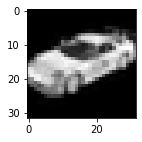

In [22]:
image_visualizer(3467, batch01_data, batch01_label)

# Data Preparation for my Model
<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
        <br> حالا چون دیتای من خیلی زیاده و لبتاب من داغونه یه زیر مجموعه از داده ها رو میگیرم برای ترین و تست
            <br> از این داده ها 5000 تا برمی دارم برای ترین و 500 تا برای تست.و همه رو هم از بچ اول بر میدارم
            <br>  و یادت باشه که باید لیبل ها رو هم وان هات اینکودینگ کنم 

In [8]:
train_input = batch01_data[0:1000,:]
train_output = batch01_label[0:1000]
test_input = batch01_data[6000:6100,:]
test_output = batch01_label[6000:6100]

In [ ]:
foo = to_categorical(test_

In [24]:
print('Train input data is of type: {} \nand with length: {}'.format(type(train_input), train_input.shape))
print('Train output data is of type: {} \nand with length: {}'.format(type(train_output),len(train_output)))

Train input data is of type: <class 'numpy.ndarray'> 
and with length: (5000, 3072)
Train output data is of type: <class 'list'> 
and with length: 5000


In [25]:
print('Test input data is of type: {} \nand with length: {}'.format(type(test_input), test_input.shape))
print('Test output data is of type: {} \nand with length: {}'.format(type(test_output),len(test_output)))

Test input data is of type: <class 'numpy.ndarray'> 
and with length: (500, 3072)
Test output data is of type: <class 'list'> 
and with length: 500


Label is: 1


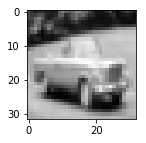

In [13]:
image_visualizer(4562, train_input, train_output)

# One-hot encoding of the output

In [9]:
import keras
from keras.utils import to_categorical
train_output_ohe = to_categorical(train_output)
test_output_ohe = to_categorical(test_output)

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\python36\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "c:\python36\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\python36\lib\site-packages\

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\python36\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\python36\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "c:\python36\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\python36\lib\site-packages\

TypeError: must be str, not list